In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# This python file are made for trying to generate simple to model with deep learning.
- To learning and playing some the plant img dataset

In [2]:
with open('train_64_nparray.atikeep', 'rb') as handle:
    X,y = pickle.load(handle)

In [3]:
X.shape

(43040, 64, 64, 3)

In [4]:
y.shape,np.unique(y)


((43040,),
 array(['Apple___Apple_scab', 'Apple___Black_rot',
        'Apple___Cedar_apple_rust', 'Apple___healthy',
        'Background_without_leaves', 'Blueberry___healthy',
        'Cherry___Powdery_mildew', 'Cherry___healthy',
        'Corn___Cercospora_leaf_spot_Gray_leaf_spot', 'Corn___Common_rust',
        'Corn___Northern_Leaf_Blight', 'Corn___healthy',
        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
        'Orange___Haunglongbing_(Citrus_greening)',
        'Peach___Bacterial_spot', 'Peach___healthy',
        'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
        'Potato___Early_blight', 'Potato___Late_blight',
        'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
        'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
        'Strawberry___healthy', 'Tomato___Bacterial_spot',
        'Tomato___Early_blight', 'Tomato___Late_blight',
        'Tomato___Lea

In [5]:
# for i in np.unique(y):
#     print(i)

In [6]:
healthy_tomato_idx = np.where(y == 'Tomato___healthy')
healthy_stwy_idx = np.where(y == 'Strawberry___healthy')
blackground_idx = np.where(y=='Background_without_leaves')

In [7]:
X_tomato = X[healthy_tomato_idx]
X_stwy = X[healthy_stwy_idx]
X_bg = X[blackground_idx]


# OBJECTIVE
- to build simple light weight model with saved `pickle` file.
- try to use deep learning.

In [8]:
X_bg.shape,X_stwy.shape,X_tomato.shape

((814, 64, 64, 3), (690, 64, 64, 3), (1101, 64, 64, 3))

In [9]:
X_bg_100 = X_bg[:800]
X_stwy_100 = X_stwy[:500]
X_tom_100 = X_tomato[:1100]

In [10]:
y_bst0 = np.zeros((800,1))
y_bst1 = np.ones((500,1))
y_bst2 = np.ones((1100,1)) + 1
y_bst = np.concatenate((y_bst0,y_bst1,y_bst2))
X_bst = np.concatenate((X_bg_100,X_stwy_100,X_tom_100))


In [11]:
y_bst.shape

(2400, 1)

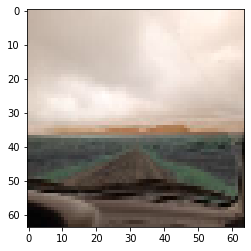

In [12]:
plt.imshow(X_bg[0])


### just checking for accurate of image loading

In [13]:
import tensorflow as tf
import simple_tf_model as simmodelgen
import sys

In [14]:
#want to save?
# SAVE = False
SAVE = True
file_name = 'simple_model_ati_result'

In [15]:
y_bst_tf = tf.keras.utils.to_categorical(y_bst)
x_train, x_test, y_train, y_test = train_test_split(X_bst  ,y_bst_tf , test_size=.2)

# Get a compiled neural network
model = simmodelgen.get_model_for_img(64,64,3)

# Fit model on training data
model.fit(x_train, y_train, epochs=20)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

# Save model to file
if SAVE:
    filename = file_name
    model.save(filename)
    print(f"Model saved to {filename}.")

Epoch 1/20


2022-10-26 00:48:53.107644: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


60/60 [==============================] - 3s 40ms/step - loss: 0.7284 - accuracy: 0.6260
Epoch 2/20
60/60 [==============================] - 2s 39ms/step - loss: 0.3933 - accuracy: 0.8141
Epoch 3/20
60/60 [==============================] - 2s 40ms/step - loss: 0.2741 - accuracy: 0.8682
Epoch 4/20
60/60 [==============================] - 3s 42ms/step - loss: 0.2848 - accuracy: 0.8464
Epoch 5/20
60/60 [==============================] - 3s 42ms/step - loss: 0.2662 - accuracy: 0.8583
Epoch 6/20
60/60 [==============================] - 3s 44ms/step - loss: 0.2567 - accuracy: 0.8656
Epoch 7/20
60/60 [==============================] - 3s 44ms/step - loss: 0.2447 - accuracy: 0.8703
Epoch 8/20
60/60 [==============================] - 3s 42ms/step - loss: 0.2213 - accuracy: 0.8740
Epoch 9/20
60/60 [==============================] - 3s 42ms/step - loss: 0.2353 - accuracy: 0.8656
Epoch 10/20
60/60 [==============================] - 3s 45ms/step - loss: 0.2135 - accuracy: 0.8687
Epoch 11/20
60/60 [=

2022-10-26 00:49:45.643949: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: simple_model_ati_result/assets
Model saved to simple_model_ati_result.


In [50]:
np.unique(y_bst_tf)
# y_bst_tf

array([0., 1.], dtype=float32)

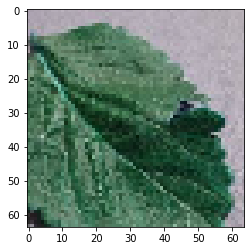

In [16]:
plt.imshow(X_stwy_100[90])

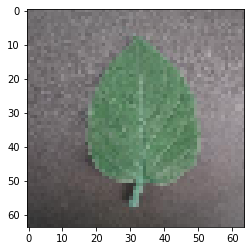

In [17]:
plt.imshow(X_tom_100[90])

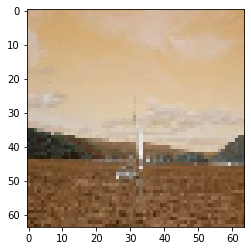

In [18]:
plt.imshow(X_bg_100[90])

# Building Conclusion
- The model was successfully build.
- With small choose dataset the DL model are unable to predict with good acc.
- but still we came at right direction. 